# The MovieLens DataSet

## Simple Recommendation System

Filtering the movies based on their popularity/ratings

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

#### Data Reading

In [2]:
#column headers for the dataset
data_cols = ['user id','movie id','rating','timestamp']
item_cols = ['movie id','movie title','release date',
'video release date','IMDb URL','unknown','Action',
'Adventure','Animation','Childrens','Comedy','Crime',
'Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance ','Sci-Fi','Thriller',
'War' ,'Western']
user_cols = ['user id','age','gender','occupation',
'zip code']

#importing the data files onto dataframes
users = pd.read_csv('ml-100k/u.user', sep='|',
names=user_cols, encoding='latin-1')
item = pd.read_csv('ml-100k/u.item', sep='|',
names=item_cols, encoding='latin-1')
data = pd.read_csv('ml-100k/u.data', sep='\t',
names=data_cols, encoding='latin-1')

#### Data Exploration

In [3]:
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


A look at the basic details of these data files

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [7]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie id              1682 non-null int64
movie title           1682 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Childrens             1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


#### Data Merging

First we merge the three dataframes into one single dataframe

In [9]:
#Create one data frame from the three
dataset = pd.merge(pd.merge(item, data),users)
dataset.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Thriller,War,Western,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076


### Simple Recommendation System

#### Number of ratings for each movie

In [10]:
ratings_total = dataset.groupby('movie title').size()
ratings_total.head()

movie title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
dtype: int64

#### Mean rating for each movie

In [11]:
ratings_mean = (dataset.groupby('movie title'))['movie title','rating'].mean()
ratings_mean.head()

,rating
movie title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


#### Result merging

In [12]:
#modify the dataframes so that we can merge the two
ratings_total = pd.DataFrame({'movie title':ratings_total.index,
'total ratings': ratings_total.values})
ratings_mean['movie title'] = ratings_mean.index

### List of Top Rated Movies

Generalized Recommendations for everyone

In [13]:
final = pd.merge(ratings_mean, ratings_total).sort_values(by = 'total ratings',
ascending= False)
final.set_index = 'movie title'

In [14]:
final.head()

,rating,movie title,total ratings
1398,4.358491,Star Wars (1977),583
333,3.803536,Contact (1997),509
498,4.155512,Fargo (1996),508
1234,4.007890,Return of the Jedi (1983),507
860,3.156701,Liar Liar (1997),485


### Plots

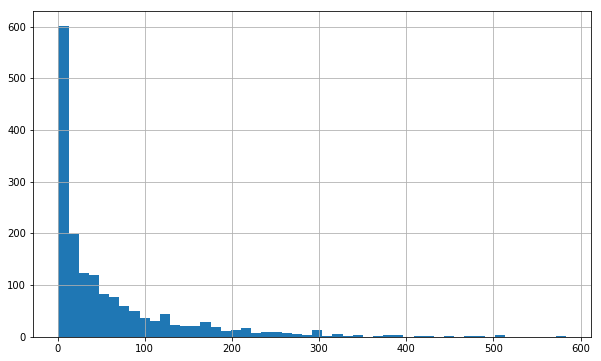

In [15]:
fig = plt.figure(figsize=(10,6))
final['total ratings'].hist(bins = 50)
plt.show()

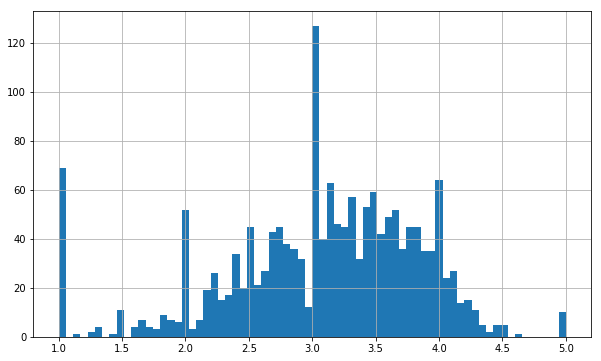

In [16]:
fig = plt.figure(figsize=(10,6))
final['rating'].hist(bins = 70)
plt.show()

### Calculating similarity between two movies

In [17]:
moviemat = dataset.pivot_table(index = 'user id', columns='movie title', values = 'rating')

Movies similar to Star Wars

In [20]:
star_wars_ratings = moviemat['Star Wars (1977)']
similar_star_wars = moviemat.corrwith(star_wars_ratings)
corr_starwars = pd.DataFrame(similar_star_wars, columns=['Correlations'])
corr_starwars.dropna(inplace=True)
corr_starwars.sort_values('Correlations', ascending=False, inplace=True)
final1 = final.reset_index().set_index('movie title').drop(['index'],axis=1)
corr_starwars = corr_starwars.join(final1['total ratings'])
similar_movies = corr_starwars[corr_starwars['total ratings']>100].sort_values('Correlations', ascending =False)
similar_movies.head()

C:\Users\rahul\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\rahul\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,Correlations,total ratings
movie title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
